# Uso de K-Means

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets, cluster

In [4]:
np.random.seed(5)

In [27]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [7]:
kmeans = cluster.KMeans

In [21]:
estimators = [
    ("k_means_wine_8", kmeans(n_clusters = 8, n_init = "auto")),
    ("k_means_wine_3", kmeans(n_clusters = 3, n_init = "auto")),
    ("k_means_wine_bad_init", kmeans(n_clusters = 3, n_init = 1, init = "random"))
]
titles = [
    "8 clusters",
    "3 clusters",
    "3 clusters, bad initialization"
]

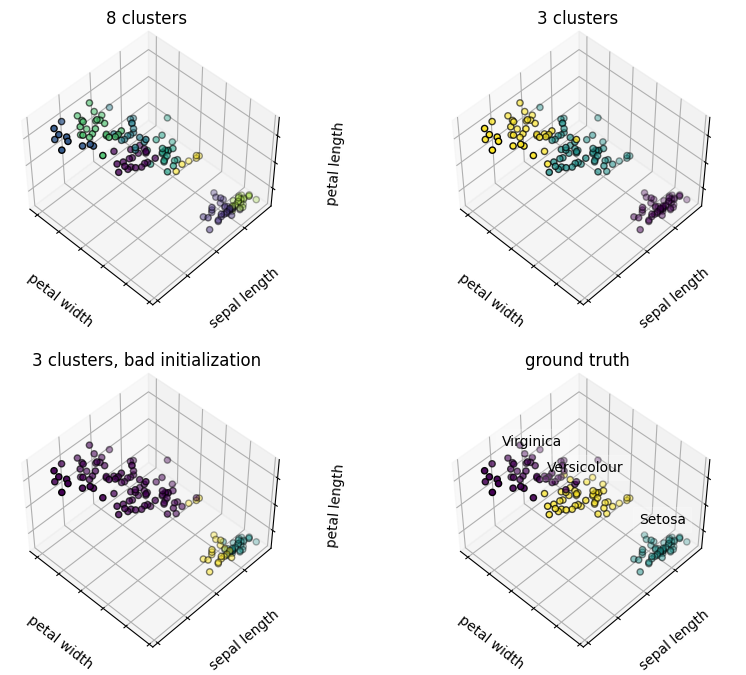

In [28]:
fig = plt.figure(figsize = (10,8))
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(
        2,
        2,
        idx + 1,
        projection = "3d",
        elev = 48,
        azim = 134)
    est.fit(x)
    labels = est.labels_

    ax.scatter(
        x[:, 3],
        x[:, 0],
        x[:, 2],
        c = labels.astype(float),
        edgecolor = "k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("petal width")
    ax.set_ylabel("sepal length")
    ax.set_zlabel("petal length")
    ax.set_title(title)

ax = fig.add_subplot(
    2,
    2,
    4, 
    projection="3d", 
    elev = 48, 
    azim = 134)
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        x[ y == label, 3 ].mean(),
        x[ y == label, 0 ].mean(),
        x[ y == label, 2 ].mean() + 2,
        name,
        horizontalalignment = "center",
        bbox = dict(alpha=0.2, edgecolor="w", facecolor="w")
    )

y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(
    x[:, 3], 
    x[:, 0],
    x[:, 2],
    c = y, 
    edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("petal width")
ax.set_ylabel("sepal length")
ax.set_zlabel("petal length")
ax.set_title("ground truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()